## Student's distribution of Pearson's coefficient

If we have two sets of data, $\{x_{i}\}$ and $\{y_{i}\}$, drawn from two univariate normal distributions we have that given $t = r \sqrt{\frac{N-2}{1-r^2}}$, where $r$ is the Pearson's coefficient, $t$ will follow a Student's t distribution with $k=N-2$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

(-5.0, 5.0)

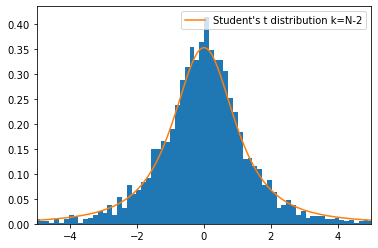

In [2]:
N=5 #number of extractions from each gaussian

np.random.seed(8)
N_times=3000 #number of times over which I repeat the extractions of N numbers

r_unc = []
t_arr = []

for i in range(N_times):
    x = stats.norm(loc=0, scale=1.5).rvs(N)
    x_mean = np.mean(x)
    y = stats.norm(loc=2, scale=0.65).rvs(N)
    y_mean = np.mean(y)
    r_unc.append(np.sum((x-x_mean)*(y-y_mean))/np.sqrt(np.sum((x-x_mean)**2)*np.sum((y-y_mean)**2)))#PEARSON'S COEFFICIENT
    t_arr.append(r_unc[i]*np.sqrt((N-2)/(1-r_unc[i]**2)))
    
plt.hist(t_arr, bins=240, density=True)
plt.plot(np.linspace(np.min(t_arr), np.max(t_arr), 1000), stats.t(2).pdf(np.linspace(np.min(t_arr), np.max(t_arr), 1000)), label="Student's t distribution k=N-2")
plt.legend()
plt.xlim(-5,5)

Now we can compare how the distribution of Pearson's coefficient change if we are considering uncorrelated or correlated data. What we notice is that the mean value of the distribution changes significantly.

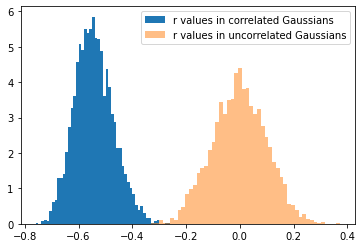

In [3]:
from astroML.stats.random import bivariate_normal

r=[]
N=100 #number of extractions from each gaussian

r_unc = [] #r values of uncorrelated sets
t_arr = [] #r values from a bidimensional gaussian

for i in range(N_times):
    x = stats.norm(loc=0, scale=1.5).rvs(N)
    x_mean = np.mean(x)
    y = stats.norm(loc=2, scale=0.65).rvs(N)
    y_mean = np.mean(y)
    r_unc.append(np.sum((x-x_mean)*(y-y_mean))/np.sqrt(np.sum((x-x_mean)**2)*np.sum((y-y_mean)**2)))#PEARSON'S COEFFICIENT

    samples = bivariate_normal(mu=[1.0,2.0], sigma_1=0.5, sigma_2=1.0, alpha=30/180*np.pi, size=N)
    xx = samples[:,0]
    xx_mean = np.mean(xx)
    yy = samples[:,1]
    yy_mean = np.mean(yy)
    r.append(np.sum((xx-xx_mean)*(yy-yy_mean))/np.sqrt(np.sum((xx-xx_mean)**2)*np.sum((yy-yy_mean)**2)))#PEARSON'S COEFFICIENT

plt.hist(r, bins=50, density=True, label='r values in correlated Gaussians')
plt.hist(r_unc, bins=50, density=True, alpha=0.5, label='r values in uncorrelated Gaussians')
plt.legend()